In [1]:
%matplotlib inline

import os
from PIL import Image
import cv2
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import torch
import albumentations as A
from albumentations.pytorch import ToTensor

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

SEED = 2020
seed_everything(SEED)

In [3]:
def transform_plot(image, transform, nrows=2, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        augmented = transform(image=np.array(image))['image']
        ax.imshow(augmented, cmap='Greys')
    plt.tight_layout()
    plt.show()

<a id="original"></a>
# Original

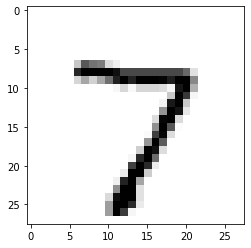

In [4]:
import torchvision

dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)
image, _ = dataset[0]
plt.imshow(np.array(image), cmap='Greys')
plt.show()

<a id="totensor"></a>
# ToTensor

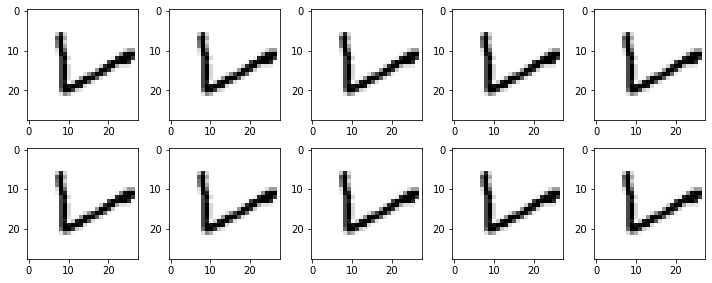

In [5]:
transform = A.Compose([
    ToTensor(num_classes=1, sigmoid=True, normalize=None),
])

transform_plot(image, transform)